In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('data.csv')

In [48]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns 
from kmodes.kmodes import KModes

In [49]:
X = df.drop('Result', axis=1)
label = df['Result']

# KModes

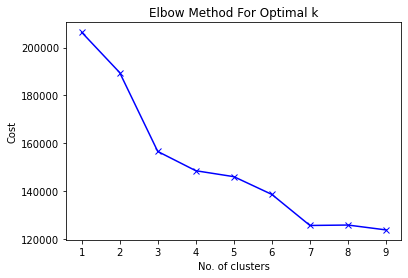

In [52]:
# Elbow curve to find optimal K
cost = []
for num_clusters in range(1,10):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=1, random_state=69)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(range(1,10), cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
kmode = KModes(n_clusters=3, init="random", n_init=1, random_state=69)
kmode.fit_predict(X)

array([0, 1, 1, ..., 2, 0, 2], dtype=uint16)

In [66]:
cluster_labels = kmode.labels_
unique, counts = np.unique(cluster_labels, return_counts=True)
dict(zip(unique, counts))

{0: 11559, 1: 5299, 2: 12474}

In [67]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 

In [68]:
pca_data['cluster'] = pd.Categorical(kmode.labels_)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

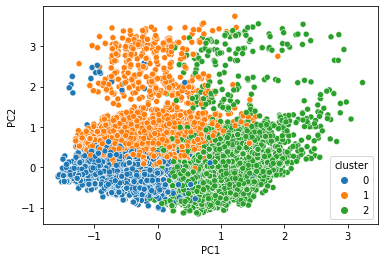

In [69]:
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)

In [27]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Single link clustering

In [31]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='hamming', linkage='single')
model = model.fit(X)

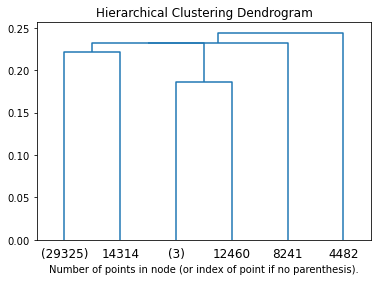

In [35]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [45]:
model = AgglomerativeClustering(n_clusters=2, affinity='hamming', linkage='complete')
model = model.fit(X)

In [38]:
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2']) 

In [39]:
pca_data['cluster'] = pd.Categorical(model.labels_)

In [46]:
cluster_labels = model.labels_
unique, counts = np.unique(cluster_labels, return_counts=True)

In [47]:
dict(zip(unique, counts))

{0: 29316, 1: 16}

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

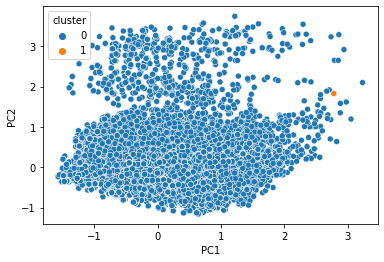

In [40]:
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)